# Bonus: Build hand written digit recogniser 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### 1. Load the MNIST dataset

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

### 2. Define a simple neural network

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = SimpleNN()

### 3. Define loss function and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

### 4. Train the network

In [ ]:
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

### 5. Evaluate the network and Visualize predictions

[Epoch 1, Batch 100] loss: 1.382
[Epoch 1, Batch 200] loss: 0.467
[Epoch 1, Batch 300] loss: 0.400
[Epoch 1, Batch 400] loss: 0.346
[Epoch 1, Batch 500] loss: 0.336
[Epoch 1, Batch 600] loss: 0.278
[Epoch 1, Batch 700] loss: 0.266
[Epoch 1, Batch 800] loss: 0.249
[Epoch 1, Batch 900] loss: 0.245
[Epoch 2, Batch 100] loss: 0.203
[Epoch 2, Batch 200] loss: 0.204
[Epoch 2, Batch 300] loss: 0.191
[Epoch 2, Batch 400] loss: 0.176
[Epoch 2, Batch 500] loss: 0.184
[Epoch 2, Batch 600] loss: 0.182
[Epoch 2, Batch 700] loss: 0.157
[Epoch 2, Batch 800] loss: 0.171
[Epoch 2, Batch 900] loss: 0.147
[Epoch 3, Batch 100] loss: 0.152
[Epoch 3, Batch 200] loss: 0.142
[Epoch 3, Batch 300] loss: 0.125
[Epoch 3, Batch 400] loss: 0.133
[Epoch 3, Batch 500] loss: 0.124
[Epoch 3, Batch 600] loss: 0.122
[Epoch 3, Batch 700] loss: 0.127
[Epoch 3, Batch 800] loss: 0.128
[Epoch 3, Batch 900] loss: 0.119
[Epoch 4, Batch 100] loss: 0.112
[Epoch 4, Batch 200] loss: 0.107
[Epoch 4, Batch 300] loss: 0.093
[Epoch 4, 

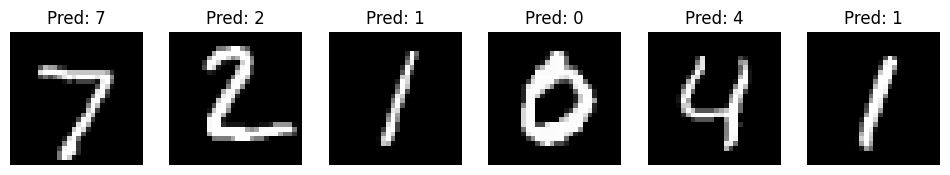

In [8]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

# Visualize some sample data and predictions
dataiter = iter(testloader)
images, labels = next(dataiter)  # Use the built-in next() function
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# Show images
fig, axes = plt.subplots(1, 6, figsize=(12, 2))
for i in range(6):
    axes[i].imshow(images[i].numpy().squeeze(), cmap='gray')
    axes[i].set_title(f'Pred: {predicted[i].item()}')
    axes[i].axis('off')
plt.show()